In [1]:
import numpy as np
import pandas as pd
from collections import Counter
import math
import os

from sklearn.tree import DecisionTreeClassifier, export_graphviz
!pip install graphviz
import graphviz

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import cm
from matplotlib import colormaps
from matplotlib.font_manager import FontProperties
from matplotlib.ticker import StrMethodFormatter
from matplotlib.ticker import ScalarFormatter
from matplotlib.colors import LinearSegmentedColormap, Normalize


In [2]:
# Define Tableau 10 Colors
tableau_colors = [
    (31, 119, 180),  # Blue 0
    (255, 127, 14),  # Orange 1
    (44, 160, 44),   # Green 2
    (214, 39, 40),   # Red 3
    (148, 103, 189), # Purple 4 
    (140, 86, 75),   # Brown 5
    (227, 119, 194), # Pink 6
    (127, 127, 127), # Gray 7
    (188, 189, 34),  # Yellow 8
    (23, 190, 207),  # Cyan 9
]

# Here's the Tableau 20 color palette ordered from coldest to warmest in a Python list:
tableau20_colors_ordered = [
    '#4E79A7', '#2B83BA', '#1F9EA3', '#50B4B4', '#76B7B2',
    '#91C7AE', '#59A14F', '#EDC948', '#FFE93F', '#FF9DA7',
    '#D95F02', '#E15759', '#B07AA1', '#DDA2D5', '#DCAF87',
    '#4D4D4D', '#A5A5A5', '#9C755F', '#BAB0AC', '#F28E2B'
]

# Normalize RGB values to range [0, 1]
tableau_colors = [(r / 255, g / 255, b / 255) for r, g, b in tableau_colors]
# font settings
font = {'family': 'Georgia', 'color':  'black', 'weight': 'normal', 'size': 20}
title_font = {'family': 'Georgia', 'color':  'black', 'weight': 'bold', 'style': 'italic', 'size': 20}
suptitle_font = FontProperties(family='Georgia', weight='bold', size=22)
legend_font = FontProperties(family='Georgia', weight='normal', size=16)
tick_font = {'family': 'Georgia', 'size': 18}

# double panel font settings
font_double = {'family': 'Georgia', 'color':  'black', 'weight': 'normal', 'size': 30}
title_font_double = {'family': 'Georgia', 'color':  'black', 'weight': 'bold', 'style': 'italic', 'size': 30}
suptitle_font_double = FontProperties(family='Georgia', weight='bold', size=32)
legend_font_double = FontProperties(family='Georgia', weight='normal', size=26)
tick_font_double = {'family': 'Georgia', 'size': 26}

# 2020 09 First Bake

## bakeout temperature vs. time

In [3]:
# Assuming 'datetime_column' is the name of your datetime column
df = pd.read_csv('../data/2020_09_first_bake/temps.csv', parse_dates=['Datetime'])
df

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5946/1692181465.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('../data/2020_09_first_bake/temps.csv', parse_dates=['Datetime'])


,Datetime,Ch 1,Ch 2,Ch 3,Ch 4,Ch 5,Ch 6,Ch 7,Ch 8,Ch 9,...,Ch 20,Ch 21,Ch 22,Ch 23,Ch 24,Ch 25,Ch 26,Ch 27,Ch 28,Average Temp
0,2020-09-08 17:33:00,18.6,18.4,18.5,18.4,18.2,18.0,17.7,18.0,17.8,...,18.6,18.5,18.2,18.4,18.6,18.5,34.5,18.6,18.4,19.020833
1,2020-09-08 17:34:00,18.7,18.5,18.5,18.4,18.3,18.0,17.8,18.0,17.8,...,18.6,18.5,18.3,18.4,18.7,18.5,35.0,18.6,18.5,19.083333
2,2020-09-08 17:35:00,18.7,18.5,18.6,18.3,18.3,18.1,17.7,17.9,17.8,...,18.6,18.5,18.2,18.4,18.7,18.5,35.6,18.6,18.4,19.087500
3,2020-09-08 17:36:00,18.8,18.6,18.8,18.4,18.4,18.2,17.7,18.0,17.8,...,18.6,18.6,18.3,18.4,18.7,18.6,36.2,18.6,18.5,19.179167
4,2020-09-08 17:37:00,18.8,18.6,18.8,18.3,18.4,18.2,17.6,18.0,17.7,...,18.6,18.6,18.3,18.4,18.6,18.5,36.8,18.6,18.4,19.162500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35235,2020-10-05 16:34:00,18.8,18.6,18.5,18.1,18.0,17.8,17.6,17.6,17.4,...,18.7,18.6,18.4,18.5,18.5,18.5,18.6,18.5,18.2,18.254167
35236,2020-10-05 16:35:00,18.8,18.5,18.4,18.1,18.1,17.9,17.7,17.7,17.5,...,18.8,18.6,18.5,18.5,18.5,18.6,18.6,18.5,18.3,18.304167
35237,2020-10-05 16:37:00,18.9,18.6,18.5,18.3,18.1,17.9,17.7,17.7,17.5,...,18.8,18.6,18.5,18.6,18.6,18.6,18.6,18.5,18.3,18.333333
35238,2020-10-05 16:38:00,18.9,18.6,18.4,18.2,18.1,17.9,17.7,17.8,17.5,...,18.8,18.6,18.5,18.6,18.6,18.6,18.6,18.5,18.3,18.333333


/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5946/1371198186.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(dates, fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5946/1371198186.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


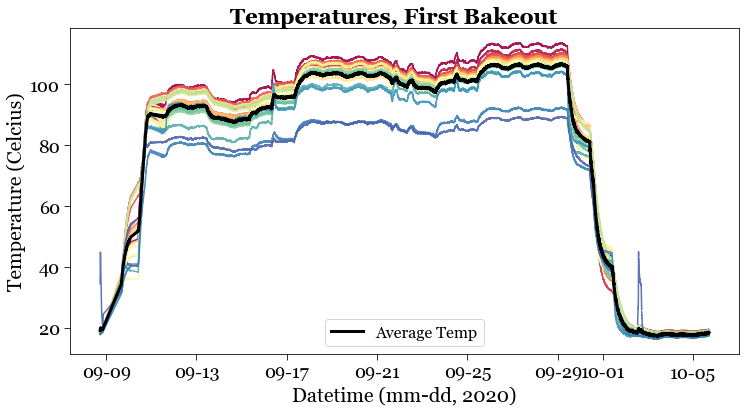

In [5]:
fig = plt.figure(figsize=(12, 6))
ax = plt.gca()

dates = df['Datetime']
colormap = 'Spectral' # this goes from warm to cool from 0 to 1, so will reverse it

num_column_names = df.columns[1:-1].tolist()
num_max_temps = [df[col].max() for col in num_column_names]
sorted_column_names = [_ for v, _ in sorted(zip(num_max_temps, num_column_names))][::-1]
num_lines = len(sorted_column_names)

for col_ind, col_name in enumerate(sorted_column_names):
    ax.plot(dates, df[col_name], color=plt.get_cmap(colormap)(col_ind/num_lines), 
            alpha=0.9, linewidth=1.5) 

ax.plot(dates, df['Average Temp'], color='black', linewidth=3, label='Average Temp') 

# Customize tick sizes
ax.tick_params(axis='both', which='major', labelsize=18, length=6)  # Adjust label size and tick length
ax.set_xticklabels(dates, fontdict=tick_font)
ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))

# Customize the plot (optional)
plt.xlabel('Datetime (mm-dd, 2020)', fontdict=font)
plt.ylabel('Temperature (Celcius)', fontdict=font)
plt.gcf().set_facecolor('white')
fig.suptitle('Temperatures, First Bakeout', fontproperties=suptitle_font, y=0.93)
plt.legend(loc='lower center', prop=legend_font)

# Show the plot
# plt.savefig('../plots/bakeout_first_temps.png', bbox_inches='tight')
# plt.savefig('../plots/bakeout_first_temps.pdf', bbox_inches='tight')
plt.show()

## log-pressure vs. time
* Loadlock Ion Pump pressure vs. Time
* Main Ion Pump pressure vs. Time

In [7]:
df_torr = pd.read_csv('../data/2020_09_first_bake/torrs.csv', parse_dates=['Datetime'])
df_torr

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5946/2329770979.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_torr = pd.read_csv('../data/2020_09_first_bake/torrs.csv', parse_dates=['Datetime'])


,Datetime,Ion Pump LL (torr),ion pump main (torr)
0,2020-09-17 09:51:00,8.300000e-07,NaN
1,2020-09-17 09:52:00,4.400000e-07,NaN
2,2020-09-17 09:53:00,3.600000e-07,NaN
3,2020-09-17 09:54:00,3.100000e-07,NaN
4,2020-09-17 09:56:00,2.900000e-07,NaN
...,...,...,...
34574,2020-10-12 10:54:00,2.000000e-09,2.400000e-10
34575,2020-10-12 10:55:00,1.700000e-09,2.400000e-10
34576,2020-10-12 10:56:00,1.600000e-09,2.400000e-10
34577,2020-10-12 10:57:00,2.100000e-09,2.500000e-10


In [8]:
p_dates = df_torr.iloc[:, 0]
LL_torrs = df_torr.iloc[:, 1]
SC_torrs = df_torr.iloc[:, 2]

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5946/3356926889.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(dates, fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5946/3356926889.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


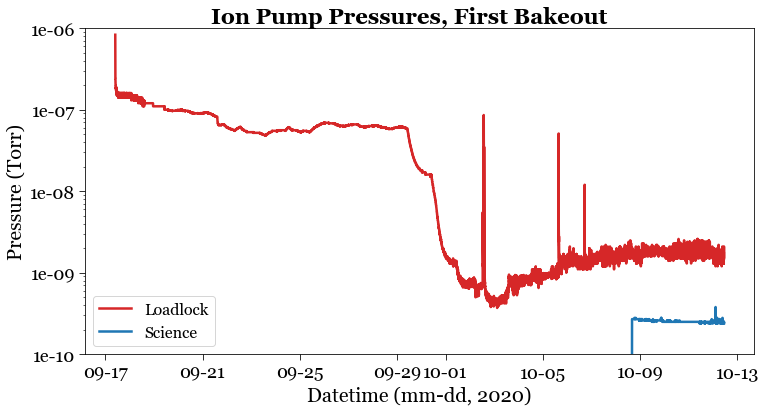

In [10]:
fig = plt.figure(figsize=(12, 6))
ax = plt.gca()

ax.semilogy(p_dates, LL_torrs, color=tableau_colors[3], linewidth=2.5, label='Loadlock') 
ax.semilogy(p_dates, SC_torrs, color=tableau_colors[0], linewidth=2.5, label='Science') 

# Customize tick sizes
ax.tick_params(axis='both', which='major', labelsize=18, length=6)  # Adjust label size and tick length
ax.set_xticklabels(dates, fontdict=tick_font)
ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
# ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
ax.set_ylim([1e-10, 1e-6])  # Adjust the limits based on your specific requirements

# Customize the plot (optional)
plt.xlabel('Datetime (mm-dd, 2020)', fontdict=font)
plt.ylabel('Pressure (Torr)', fontdict=font)
plt.gcf().set_facecolor('white')
fig.suptitle('Ion Pump Pressures, First Bakeout', fontproperties=suptitle_font, y=0.93)
plt.legend(loc='lower left', prop=legend_font)

# Show the plot
# plt.savefig('../plots/bakeout_first_pressure.png', bbox_inches='tight')
# plt.savefig('../plots/bakeout_first_pressure.pdf', bbox_inches='tight')
plt.show()

## log-pressure and temperature

In [11]:
# make datetime the same index
df_temp2 = df.set_index('Datetime')
df_torr2 = df_torr.set_index('Datetime')

# merge the two dataframe on index
merged_df = pd.merge(df_temp2['Average Temp'], df_torr2['Ion Pump LL (torr)'], 
                     left_index=True, right_index=True)
merged_df

,Average Temp,Ion Pump LL (torr)
Datetime,,
2020-09-17 09:51:00,97.833333,8.300000e-07
2020-09-17 09:52:00,97.795833,4.400000e-07
2020-09-17 09:53:00,97.812500,3.600000e-07
2020-09-17 09:54:00,97.870833,3.100000e-07
2020-09-17 09:56:00,97.854167,2.900000e-07
...,...,...
2020-10-05 16:34:00,18.254167,1.300000e-09
2020-10-05 16:35:00,18.304167,1.300000e-09
2020-10-05 16:37:00,18.333333,1.400000e-09


/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5946/1267740589.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5946/1267740589.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


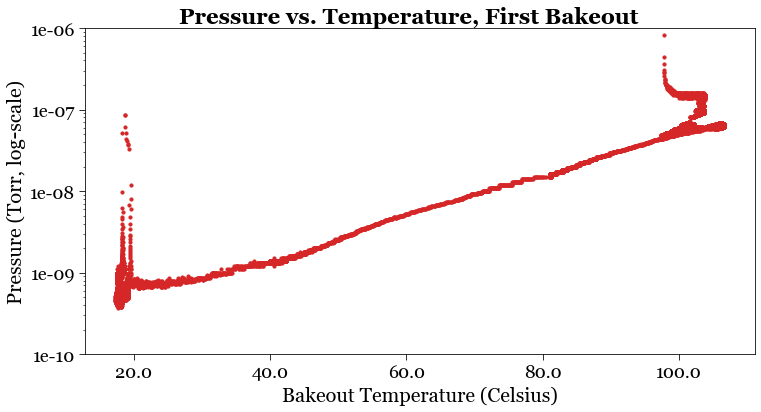

In [12]:
# plotting average temp, and LL pressure 
fig = plt.figure(figsize=(12, 6))
ax = plt.gca()

temps = merged_df['Average Temp']
torrs = merged_df['Ion Pump LL (torr)']

ax.scatter(temps, torrs,
            marker='o', color=tableau_colors[3], s=10,
            alpha=1)

ax.set_yscale('log')
# Customize tick sizes
ax.tick_params(axis='both', which='major', labelsize=18, length=6)  # Adjust label size and tick length
ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
# ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
ax.set_ylim([1e-10, 1e-6])  # Adjust the limits based on your specific requirements

# Customize the plot (optional)
plt.xlabel('Bakeout Temperature (Celsius)', fontdict=font)
plt.ylabel('Pressure (Torr, log-scale)', fontdict=font)
plt.gcf().set_facecolor('white')
fig.suptitle('Pressure vs. Temperature, First Bakeout', fontproperties=suptitle_font, y=0.93)

# Show the plot
# plt.savefig('../plots/bakeout_first_pressure_vs_temp.png', bbox_inches='tight')
# plt.savefig('../plots/bakeout_first_pressure_vs_temp.pdf', bbox_inches='tight')
plt.show()

# 2020 11 Second Bake (leak)

## bakeout temperature vs. time

In [13]:
# Assuming 'datetime_column' is the name of your datetime column
df = pd.read_csv('../data/2020_11_second_bake/temps.csv', parse_dates=['Datetime'])
df

,Datetime,Ch 1,Ch 2,Ch 3,Ch 4,Ch 5,Ch 6,Ch 7,Ch 8,Ch 9,...,Ch 19,Ch 20,Ch 21,Ch 22,Ch 23,Ch 24,Ch 25,Ch 26,Ch 27,Ch 28
0,2020-10-14 12:33:00,18.8,18.5,18.3,18.2,17.9,17.8,17.5,17.5,17.3,...,19.0,18.7,18.7,18.4,18.6,18.6,18.5,35.0,18.3,18.2
1,2020-10-14 12:34:00,18.8,18.5,18.3,18.2,17.9,17.8,17.5,17.6,17.3,...,19.0,18.8,18.7,18.5,18.6,18.7,18.5,35.3,18.3,18.2
2,2020-10-14 12:35:00,18.8,18.5,18.3,18.2,17.9,17.8,17.5,17.6,17.3,...,19.1,18.8,18.7,18.5,18.6,18.7,18.5,35.7,18.3,18.2
3,2020-10-14 12:36:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-10-14 12:37:00,18.9,18.6,18.4,18.2,18.0,17.8,17.5,17.6,17.4,...,19.1,18.8,18.7,18.5,18.6,18.6,18.5,36.2,18.3,18.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68492,2020-12-06 23:42:00,997.4,997.4,997.4,997.4,997.4,997.4,997.4,997.4,997.4,...,997.4,997.4,997.4,997.4,997.4,997.4,997.4,997.4,997.4,997.4
68493,2020-12-06 23:43:00,997.4,997.4,997.4,997.4,997.4,997.4,997.4,997.4,997.4,...,997.4,997.4,997.4,997.4,997.4,997.4,997.4,997.4,997.4,997.4
68494,2020-12-06 23:44:00,997.4,997.4,997.4,997.4,997.4,997.4,997.4,997.4,997.4,...,997.4,997.4,997.4,997.4,997.4,997.4,997.4,997.4,997.4,997.4
68495,2020-12-06 23:45:00,997.4,997.4,997.4,997.4,997.4,997.4,997.4,997.4,997.4,...,997.4,997.4,997.4,997.4,997.4,997.4,997.4,997.4,997.4,997.4


In [14]:
df['Average Temp'] = df.iloc[:, 1:].mean(axis=1)

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5946/3599625061.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(dates, fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5946/3599625061.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


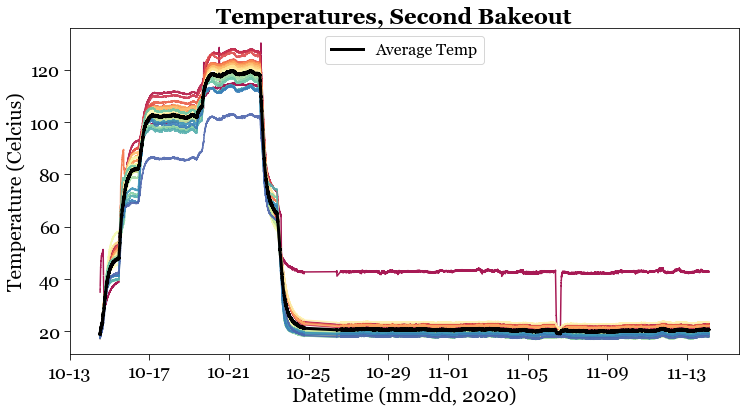

In [15]:
fig = plt.figure(figsize=(12, 6))
ax = plt.gca()

colormap = 'Spectral' # this goes from warm to cool from 0 to 1, so will reverse it

# Define the datetime range
start_datetime = '2020-10-14 12:33:00'
end_datetime = '2020-11-14 23:00:00'

# Filter the DataFrame to include only the rows within the datetime range
mask = (df['Datetime'] >= start_datetime) & (df['Datetime'] <= end_datetime)
filtered_df = df.loc[mask]

dates = filtered_df['Datetime']

num_column_names = filtered_df.columns[1:-1].tolist()
num_max_temps = [filtered_df[col].max() for col in num_column_names]
sorted_column_names = [_ for v, _ in sorted(zip(num_max_temps, num_column_names))][::-1]
num_lines = len(sorted_column_names)

for col_ind, col_name in enumerate(sorted_column_names):
    ax.plot(dates, filtered_df[col_name], color=plt.get_cmap(colormap)(col_ind/num_lines), 
            alpha=0.9, linewidth=1.5) 

ax.plot(dates, filtered_df['Average Temp'], color='black', linewidth=3, label='Average Temp') 

# Customize tick sizes
ax.tick_params(axis='both', which='major', labelsize=18, length=6)  # Adjust label size and tick length
ax.set_xticklabels(dates, fontdict=tick_font)
ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))

# Customize the plot (optional)
plt.xlabel('Datetime (mm-dd, 2020)', fontdict=font)
plt.ylabel('Temperature (Celcius)', fontdict=font)
plt.gcf().set_facecolor('white')
fig.suptitle('Temperatures, Second Bakeout', fontproperties=suptitle_font, y=0.93)
plt.legend(loc='upper center', prop=legend_font)

# Show the plot
# plt.savefig('../plots/bakeout_second_temps.png', bbox_inches='tight')
# plt.savefig('../plots/bakeout_second_temps.pdf', bbox_inches='tight')
plt.show()

## log-pressure vs. time
* Loadlock Ion Pump pressure vs. Time
* Main Ion Pump pressure vs. Time
* Ion Gauge pressure vs. Time

In [16]:
df_torr = pd.read_csv('../data/2020_11_second_bake/torrs.csv', parse_dates=['Datetime'])
df_torr

,Datetime,Ion Pump LL (torr),ion pump main (torr),Ion Gauge
0,2020-10-14 12:33:00,1.700000e-09,3.300000e-10,3.450000e-09
1,2020-10-14 12:34:00,2.300000e-09,3.300000e-10,3.390000e-09
2,2020-10-14 12:35:00,2.700000e-09,3.300000e-10,3.350000e-09
3,2020-10-14 12:36:00,2.500000e-09,3.200000e-10,3.290000e-09
4,2020-10-14 12:37:00,2.500000e-09,3.200000e-10,3.250000e-09
...,...,...,...,...
68492,2020-12-06 23:42:00,7.200000e-10,1.500000e-10,1.040000e-09
68493,2020-12-06 23:43:00,7.300000e-10,1.500000e-10,1.030000e-09
68494,2020-12-06 23:44:00,6.900000e-10,1.500000e-10,1.030000e-09
68495,2020-12-06 23:45:00,6.900000e-10,1.500000e-10,1.050000e-09


In [17]:
# Define the datetime range
start_datetime = '2020-10-14 12:33:00'
end_datetime = '2020-11-14 23:00:00'

# Filter the DataFrame to include only the rows within the datetime range
mask = (df_torr['Datetime'] >= start_datetime) & (df_torr['Datetime'] <= end_datetime)
filtered_df_torr = df_torr.loc[mask]

dates = filtered_df_torr['Datetime']

p_dates = filtered_df_torr['Datetime']
LL_torrs = filtered_df_torr.iloc[:, 1]
SC_torrs = filtered_df_torr.iloc[:, 2]
IP_torrs = filtered_df_torr.iloc[:, 3]

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5946/2498879243.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(dates, fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5946/2498879243.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


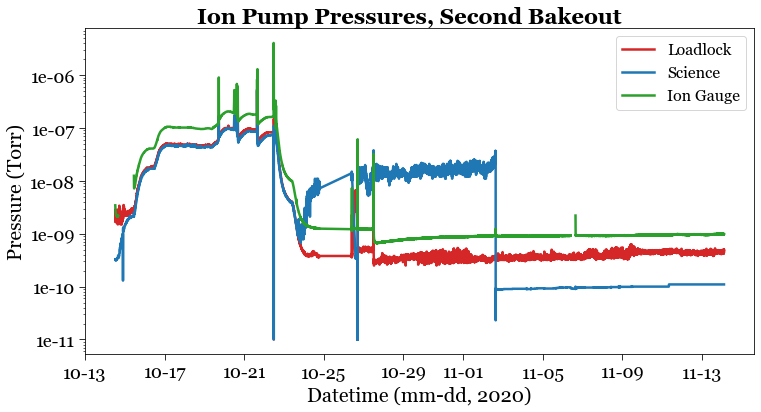

In [18]:
fig = plt.figure(figsize=(12, 6))
ax = plt.gca()

ax.semilogy(p_dates, LL_torrs, color=tableau_colors[3], linewidth=2.5, label='Loadlock') 
ax.semilogy(p_dates, SC_torrs, color=tableau_colors[0], linewidth=2.5, label='Science') 
ax.semilogy(p_dates, IP_torrs, color=tableau_colors[2], linewidth=2.5, label='Ion Gauge') 

# Customize tick sizes
ax.tick_params(axis='both', which='major', labelsize=18, length=6)  # Adjust label size and tick length
ax.set_xticklabels(dates, fontdict=tick_font)
ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
# ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
# ax.set_ylim([1e-10, 1e-6])  # Adjust the limits based on your specific requirements

# Customize the plot (optional)
plt.xlabel('Datetime (mm-dd, 2020)', fontdict=font)
plt.ylabel('Pressure (Torr)', fontdict=font)
plt.gcf().set_facecolor('white')
fig.suptitle('Ion Pump Pressures, Second Bakeout', fontproperties=suptitle_font, y=0.93)
plt.legend(loc='upper right', prop=legend_font)

# Show the plot
# plt.savefig('../plots/bakeout_second_pressure.png', bbox_inches='tight')
# plt.savefig('../plots/bakeout_second_pressure.pdf', bbox_inches='tight')
plt.show()

## log-pressure and temperature

In [19]:
df_temp2['Average Temp']

Datetime
2020-09-08 17:33:00    19.020833
2020-09-08 17:34:00    19.083333
2020-09-08 17:35:00    19.087500
2020-09-08 17:36:00    19.179167
2020-09-08 17:37:00    19.162500
                         ...    
2020-10-05 16:34:00    18.254167
2020-10-05 16:35:00    18.304167
2020-10-05 16:37:00    18.333333
2020-10-05 16:38:00    18.333333
2020-10-05 16:39:00    18.341667
Name: Average Temp, Length: 35240, dtype: float64

In [20]:
# make datetime the same index
df_temp2 = filtered_df.set_index('Datetime')
df_torr2 = filtered_df_torr.set_index('Datetime')

# merge the two dataframe on index
merged_df = pd.merge(df_temp2[['Average Temp']], df_torr2, 
                     left_index=True, right_index=True)
merged_df

,Average Temp,Ion Pump LL (torr),ion pump main (torr),Ion Gauge
Datetime,,,,
2020-10-14 12:33:00,18.945833,1.700000e-09,3.300000e-10,3.450000e-09
2020-10-14 12:34:00,18.979167,2.300000e-09,3.300000e-10,3.390000e-09
2020-10-14 12:35:00,19.008333,2.700000e-09,3.300000e-10,3.350000e-09
2020-10-14 12:36:00,NaN,2.500000e-09,3.200000e-10,3.290000e-09
2020-10-14 12:37:00,19.041667,2.500000e-09,3.200000e-10,3.250000e-09
...,...,...,...,...
2020-11-14 02:21:00,20.695833,4.500000e-10,1.100000e-10,9.900000e-10
2020-11-14 02:22:00,20.691667,4.400000e-10,1.100000e-10,9.730000e-10
2020-11-14 02:23:00,20.695833,4.500000e-10,1.100000e-10,9.870000e-10


In [21]:
merged_df.columns

Index(['Average Temp', 'Ion Pump LL (torr)', 'ion pump main (torr)',
       'Ion Gauge'],
      dtype='object')

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5946/2219457806.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5946/2219457806.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


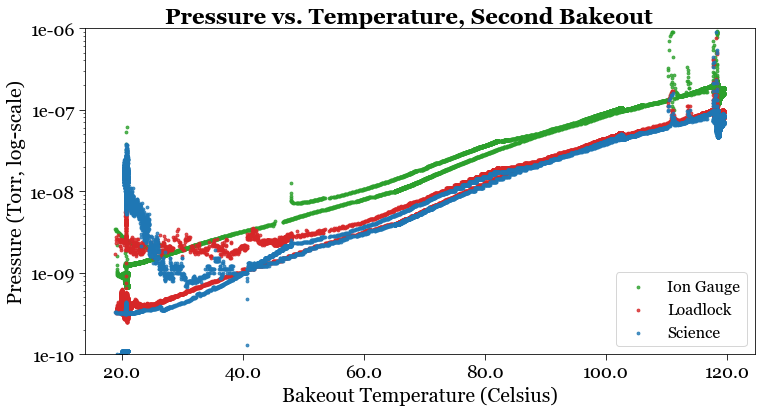

In [22]:
# plotting average temp, and LL pressure 
fig = plt.figure(figsize=(12, 6))
ax = plt.gca()

temps = merged_df['Average Temp']
torrs_LL = merged_df['Ion Pump LL (torr)']
torrs_SC = merged_df['ion pump main (torr)']
torrs_IG = merged_df['Ion Gauge']

ax.scatter(temps, torrs_IG,
            marker='o', color=tableau_colors[2], s=8,
            alpha=0.8, label='Ion Gauge')
ax.scatter(temps, torrs_LL,
            marker='o', color=tableau_colors[3], s=8,
            alpha=0.8, label='Loadlock')
ax.scatter(temps, torrs_SC,
            marker='o', color=tableau_colors[0], s=8,
            alpha=0.8, label='Science')

ax.set_yscale('log')
# Customize tick sizes
ax.tick_params(axis='both', which='major', labelsize=18, length=6)  # Adjust label size and tick length
ax.set_ylim([1e-10, 1e-6])  # Adjust the limits based on your specific requirements
ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
# ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))

# Customize the plot (optional)
plt.xlabel('Bakeout Temperature (Celsius)', fontdict=font)
plt.ylabel('Pressure (Torr, log-scale)', fontdict=font)
plt.gcf().set_facecolor('white')
fig.suptitle('Pressure vs. Temperature, Second Bakeout', fontproperties=suptitle_font, y=0.93)
plt.legend(loc='lower right', prop=legend_font)

# Show the plot
# plt.savefig('../plots/bakeout_second_pressure_vs_temp.png', bbox_inches='tight')
# plt.savefig('../plots/bakeout_second_pressure_vs_temp.pdf', bbox_inches='tight')
plt.show()

# Grafana 2022 data

In [25]:
first_temp = pd.read_csv('../data/2023_Grafana_bake/first_bake_all_Temperatures-data-as-seriestocolumns-2023-06-04 16_20_57.csv', parse_dates=['Time'])
first_temp.set_index('Time', inplace=True)
first_temp['AverageTemp'] = first_temp.mean(axis=1)
# get rid of loose thermocouple data
first_temp = first_temp[(first_temp.index > '2022-05-20 11:00:00') & (first_temp.index < '2022-05-29 11:00:00')]

first_temp

,ANGV,AVLV,BELL,BFTR,BGSS,BL2T,BNSS,BSSS,BTLL,CFCD,...,VP4B,VP4E,VP4W,VP8N,VP8S,VPBW,VPTE,WTLL,XPMP,AverageTemp
Time,,,,,,,,,,,,,,,,,,,,,
2022-05-20 11:30:00,20.3,NaN,21.4,20.5,21.6,NaN,21.6,21.6,21.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.7,NaN,21.600000
2022-05-20 12:00:00,20.4,NaN,21.3,20.5,21.6,NaN,21.8,21.6,21.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.7,NaN,21.657692
2022-05-20 12:30:00,20.4,NaN,21.3,20.5,21.6,NaN,21.6,21.7,21.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.8,NaN,21.673077
2022-05-20 13:00:00,20.6,NaN,21.9,20.7,21.7,NaN,21.5,21.8,21.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.1,NaN,21.884615
2022-05-20 13:30:00,20.7,NaN,22.3,21.0,21.8,NaN,21.4,21.9,21.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.5,NaN,22.157692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-29 08:30:00,20.0,NaN,20.8,20.2,21.5,NaN,21.3,21.7,20.6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.2,NaN,21.150000
2022-05-29 09:00:00,20.0,NaN,20.6,20.2,21.5,NaN,21.2,21.7,20.6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.3,NaN,21.176923
2022-05-29 09:30:00,20.0,NaN,20.8,20.2,21.4,NaN,21.4,21.6,20.6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.2,NaN,21.138462


In [26]:
first_pressure = pd.read_csv('../data/2023_Grafana_bake/first_bake_both_Pressures-data-as-seriestocolumns-2023-06-04 16_30_59.csv', parse_dates=['Time'])
first_pressure.set_index('Time', inplace=True)
first_pressure

,Loadlock ion pump,Main ion pump
Time,,
2022-05-12 19:00:00,NaN,NaN
2022-05-12 20:00:00,NaN,NaN
2022-05-12 21:00:00,NaN,NaN
2022-05-12 22:00:00,NaN,NaN
2022-05-12 23:00:00,NaN,NaN
...,...,...
2022-06-19 06:00:00,NaN,NaN
2022-06-19 07:00:00,NaN,NaN
2022-06-19 08:00:00,NaN,NaN


In [27]:
second_temp = pd.read_csv('../data/2023_Grafana_bake/second_bake_all_Temperatures-data-as-seriestocolumns-2023-06-04 16_24_59.csv', parse_dates=['Time'])
second_temp.set_index('Time', inplace=True)
second_temp['AverageTemp'] = second_temp.mean(axis=1)
second_temp = second_temp[(second_temp.index > '2022-05-20 11:00:00') & (second_temp.index < '2022-08-20 11:00:00')]
second_temp

,ANGV,BELL,BFTR,BGSS,BNSS,BSSS,BTLL,ETLL,FDRT,IOGG,...,TFLL,TGSS,TNS1,TNSS,TOLL,TSS1,TSSS,TTGV,WTLL,AverageTemp
Time,,,,,,,,,,,,,,,,,,,,,
2022-08-07 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-07 21:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-07 21:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-07 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-07 22:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-20 09:20:00,20.1,20.9,20.3,21.6,21.6,21.6,21.0,20.4,21.0,20.7,...,20.3,22.0,21.7,21.6,20.8,21.7,21.8,21.8,20.3,21.211538
2022-08-20 09:40:00,20.1,20.9,20.3,21.6,21.2,21.8,20.9,20.6,21.0,20.9,...,20.5,22.0,21.7,21.7,20.7,21.8,21.8,21.8,20.4,21.261538
2022-08-20 10:00:00,20.1,20.8,20.3,21.7,21.3,21.8,20.8,20.6,20.9,20.8,...,20.5,21.9,21.7,21.7,20.7,21.9,21.8,21.8,20.4,21.253846


In [29]:
second_pressure = pd.read_csv('../data/2023_Grafana_bake/second_bake_both_Pressures-data-as-seriestocolumns-2023-06-04 16_29_58.csv', parse_dates=['Time'])
second_pressure.set_index('Time', inplace=True)
second_pressure

,Loadlock ion pump,Main ion pump
Time,,
2022-08-07 10:00:00,NaN,NaN
2022-08-07 10:30:00,NaN,NaN
2022-08-07 11:00:00,NaN,NaN
2022-08-07 11:30:00,NaN,NaN
2022-08-07 12:00:00,NaN,NaN
...,...,...
2022-08-28 21:30:00,NaN,NaN
2022-08-28 22:00:00,NaN,NaN
2022-08-28 22:30:00,NaN,NaN


/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5946/274961616.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(dates, fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5946/274961616.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


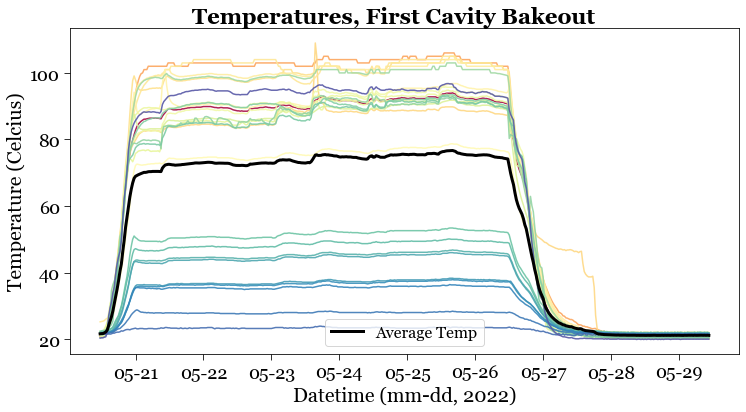

In [30]:
fig = plt.figure(figsize=(12, 6))
ax = plt.gca()

df = first_temp
dates = df.index
colormap = 'Spectral' # this goes from warm to cool from 0 to 1, so will reverse it

num_column_names = df.columns[:-1].tolist()
num_max_temps = [df[col].max() for col in num_column_names]
sorted_column_names = [_ for v, _ in sorted(zip(num_max_temps, num_column_names))][::-1]
num_lines = len(sorted_column_names)

for col_ind, col_name in enumerate(sorted_column_names):
    ax.plot(dates, df[col_name], color=plt.get_cmap(colormap)(col_ind/num_lines), 
            alpha=0.9, linewidth=1.5) 

ax.plot(dates, df['AverageTemp'], color='black', linewidth=3, label='Average Temp') 

# Customize tick sizes
ax.tick_params(axis='both', which='major', labelsize=18, length=6)  # Adjust label size and tick length
ax.set_xticklabels(dates, fontdict=tick_font)
ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)
# ax.set_ylim(0, 120)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))

# Customize the plot (optional)
plt.xlabel('Datetime (mm-dd, 2022)', fontdict=font)
plt.ylabel('Temperature (Celcius)', fontdict=font)
plt.gcf().set_facecolor('white')
fig.suptitle('Temperatures, First Cavity Bakeout', fontproperties=suptitle_font, y=0.93)
plt.legend(loc='lower center', prop=legend_font)

# Show the plot
# plt.savefig('../plots/bakeout_first_cavity_temps.png', bbox_inches='tight')
# plt.savefig('../plots/bakeout_first_cavity_temps.pdf', bbox_inches='tight')
plt.show()

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5946/87062709.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(dates, fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5946/87062709.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


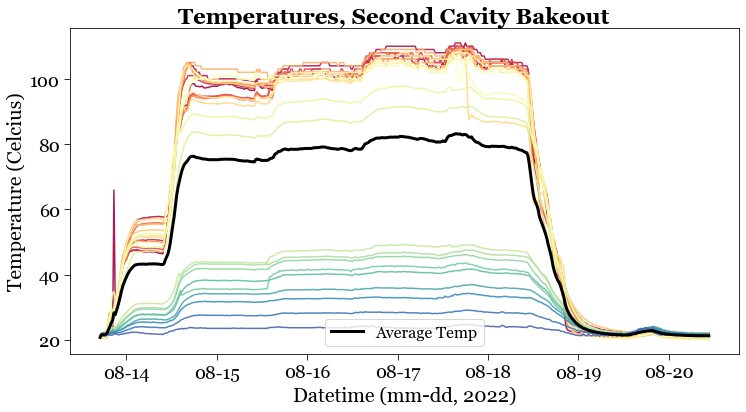

In [31]:
fig = plt.figure(figsize=(12, 6))
ax = plt.gca()

df = second_temp
dates = df.index
colormap = 'Spectral' # this goes from warm to cool from 0 to 1, so will reverse it

num_column_names = df.columns[:-1].tolist()
num_max_temps = [df[col].max() for col in num_column_names]
sorted_column_names = [_ for v, _ in sorted(zip(num_max_temps, num_column_names))][::-1]
num_lines = len(sorted_column_names)

for col_ind, col_name in enumerate(sorted_column_names):
    ax.plot(dates, df[col_name], color=plt.get_cmap(colormap)(col_ind/num_lines), 
            alpha=0.9, linewidth=1.5) 

ax.plot(dates, df['AverageTemp'], color='black', linewidth=3, label='Average Temp') 

# Customize tick sizes
ax.tick_params(axis='both', which='major', labelsize=18, length=6)  # Adjust label size and tick length
ax.set_xticklabels(dates, fontdict=tick_font)
ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)
# ax.set_ylim(0, 120)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))

# Customize the plot (optional)
plt.xlabel('Datetime (mm-dd, 2022)', fontdict=font)
plt.ylabel('Temperature (Celcius)', fontdict=font)
plt.gcf().set_facecolor('white')
fig.suptitle('Temperatures, Second Cavity Bakeout', fontproperties=suptitle_font, y=0.93)
plt.legend(loc='lower center', prop=legend_font)

# Show the plot
# plt.savefig('../plots/bakeout_second_cavity_temps.png', bbox_inches='tight')
# plt.savefig('../plots/bakeout_second_cavity_temps.pdf', bbox_inches='tight')
plt.show()

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5946/323570990.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(dates, fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5946/323570990.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


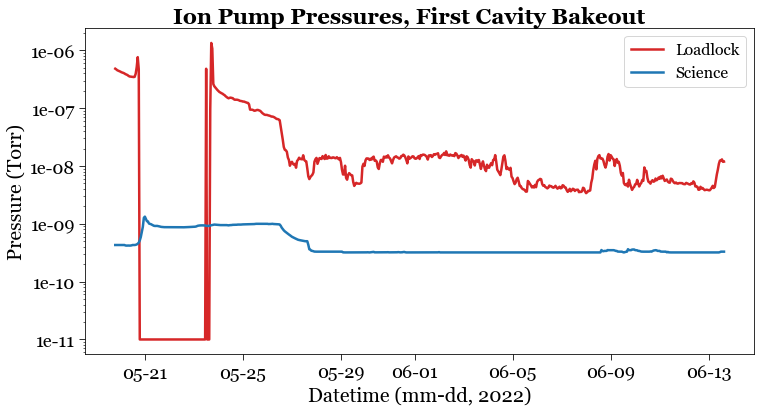

In [32]:
fig = plt.figure(figsize=(12, 6))
ax = plt.gca()

p_dates = first_pressure.index
LL_torrs = first_pressure.iloc[:, 0]
SC_torrs = first_pressure.iloc[:, 1]

ax.semilogy(p_dates, LL_torrs, color=tableau_colors[3], linewidth=2.5, label='Loadlock') 
ax.semilogy(p_dates, SC_torrs, color=tableau_colors[0], linewidth=2.5, label='Science') 

# Customize tick sizes
ax.tick_params(axis='both', which='major', labelsize=18, length=6)  # Adjust label size and tick length
ax.set_xticklabels(dates, fontdict=tick_font)
ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
# ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
# ax.set_ylim([1e-10, 1e-6])  # Adjust the limits based on your specific requirements

# Customize the plot (optional)
plt.xlabel('Datetime (mm-dd, 2022)', fontdict=font)
plt.ylabel('Pressure (Torr)', fontdict=font)
plt.gcf().set_facecolor('white')
fig.suptitle('Ion Pump Pressures, First Cavity Bakeout', fontproperties=suptitle_font, y=0.93)
plt.legend(loc='upper right', prop=legend_font)

# Show the plot
# plt.savefig('../plots/bakeout_first_cavity_pressure.png', bbox_inches='tight')
# plt.savefig('../plots/bakeout_first_cavity_pressure.pdf', bbox_inches='tight')
plt.show()

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5946/3288860850.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(dates, fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5946/3288860850.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


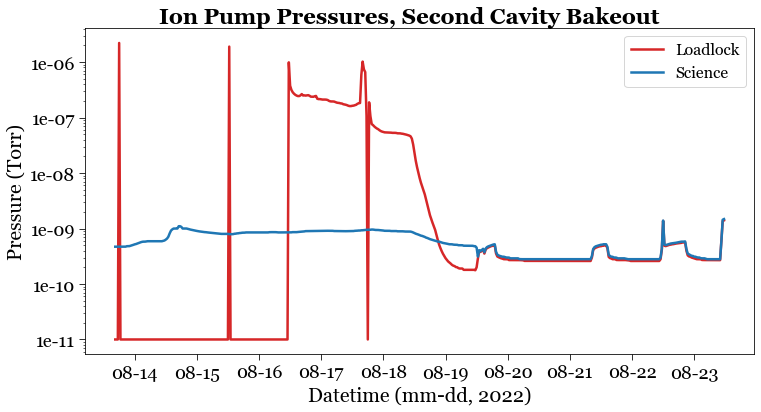

In [33]:
fig = plt.figure(figsize=(12, 6))
ax = plt.gca()

p_dates = second_pressure.index
LL_torrs = second_pressure.iloc[:, 0] # index shifted due to time column indexing
SC_torrs = second_pressure.iloc[:, 1]

ax.semilogy(p_dates, LL_torrs, color=tableau_colors[3], linewidth=2.5, label='Loadlock') 
ax.semilogy(p_dates, SC_torrs, color=tableau_colors[0], linewidth=2.5, label='Science') 

# Customize tick sizes
ax.tick_params(axis='both', which='major', labelsize=18, length=6)  # Adjust label size and tick length
ax.set_xticklabels(dates, fontdict=tick_font)
ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
# ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
# ax.set_ylim([1e-10, 1e-6])  # Adjust the limits based on your specific requirements

# Customize the plot (optional)
plt.xlabel('Datetime (mm-dd, 2022)', fontdict=font)
plt.ylabel('Pressure (Torr)', fontdict=font)
plt.gcf().set_facecolor('white')
fig.suptitle('Ion Pump Pressures, Second Cavity Bakeout', fontproperties=suptitle_font, y=0.93)
plt.legend(loc='upper right', prop=legend_font)

# Show the plot
# plt.savefig('../plots/bakeout_second_cavity_pressure.png', bbox_inches='tight')
# plt.savefig('../plots/bakeout_second_cavity_pressure.pdf', bbox_inches='tight')
plt.show()